## Test code pour vérifier comment ils ont des input de 320 features seulement !

# 06 generate feature vectors by concatenating multi_frames
    vectorarray = numpy.zeros((vectorarray_size, dims), float)
    for t in range(frames):
        vectorarray[:, n_mels * t: n_mels * (t + 1)] = log_mel_spectrogram[:, t: t + vectorarray_size].T

    return vectorarray

## 1) import functions to import data

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random

import librosa
import librosa.display
import matplotlib.pyplot as plt

%run GetCSV.py                # Download the CSV file, save as df
%run Train_test_sets_maker.py # Create train & test sets
%run MinMaxNormalisation.py   # Normalization [0,1] * factor

In [9]:
df_normal, df_abnormal = Get_CSV(['fan'], ['id_00'])

In [14]:
train_set, test_set, test_labels = Train_test_sets_maker(df_normal,df_abnormal)

C:\Users\carbo\Documents\MIMII\Notebooks\Train_test_sets_maker.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_test_data['labels'] = [1] * abnormal_data_length


In [16]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,20022,20023,20024,20025,20026,20027,20028,20029,20030,20031
354,-16.827985,-17.338368,-14.226440,-12.661802,-17.456603,-13.009694,-14.732296,-12.064816,-16.943266,-18.035568,...,-49.302259,-49.417864,-50.387670,-50.643505,-49.544712,-48.951563,-48.227064,-47.619629,-49.504729,-50.691647
612,-15.006078,-9.430022,-9.137192,-5.447269,-12.234863,-12.858909,-9.874838,-14.407463,-11.989306,-10.491162,...,-49.053251,-46.990322,-49.969679,-49.227285,-49.562897,-49.981635,-49.445640,-49.479995,-48.038683,-46.955767
306,-8.794572,-9.818213,-17.530849,-15.912073,-11.262063,-8.856400,-6.273538,-10.825363,-12.917838,-9.033689,...,-47.405101,-51.828553,-49.062561,-51.072361,-52.533555,-50.924869,-54.644556,-51.976513,-50.136375,-46.320503
989,-12.017857,-8.894652,-5.194031,-5.615556,-7.620822,-15.092662,-12.179529,-7.425242,-12.455214,-10.729638,...,-54.562008,-50.461910,-52.630113,-56.124943,-55.083241,-54.287451,-56.411812,-56.209115,-55.099797,-57.141396
9,-8.933886,-3.800511,-10.913567,-5.281701,-4.509316,-6.416597,-7.882042,-13.249719,-10.926549,-6.833192,...,-53.251302,-53.791394,-55.361972,-51.899785,-52.821717,-52.714666,-54.757756,-51.461129,-50.388288,-51.630972


## 2) import data + spectrogram

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

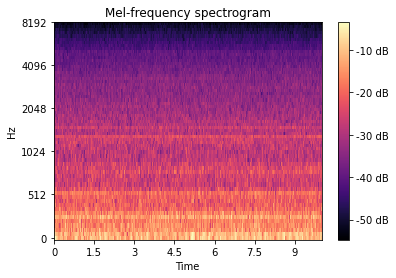

In [17]:
normal = train_set.iloc[30:31].to_numpy()
normal_spec = normal.reshape(64,313)

fig, ax = plt.subplots()
img = librosa.display.specshow(normal_spec, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## 3) apply concatenation of multi-frames 

In [26]:
frames = 5 
n_mels = 64
dims = frames * n_mels

vectorarray_size = len(normal_spec[0, :]) - frames + 1

vectorarray = np.zeros((vectorarray_size, dims), float)
for t in range(frames):
       vectorarray[:, n_mels * t: n_mels * (t + 1)] = normal_spec[:, t: t + vectorarray_size].T

In [19]:
vectorarray_size

309

In [20]:
normal_spec.shape

(64, 313)

In [30]:
vectorarray.shape

(309, 320)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

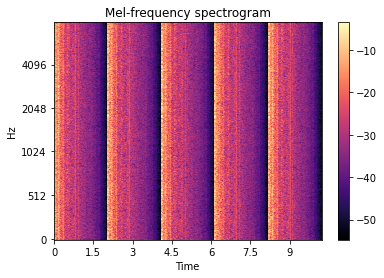

In [34]:
fig, ax = plt.subplots()
img = librosa.display.specshow(vectorarray, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax)
ax.set(title='Mel-frequency spectrogram')

In [1]:
309*320

98880